In [1]:
# !pip3 install nltk

In [2]:
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline
cf.go_offline()

## Instructions on downloading stopwords package from nltk library
- For this project, we will be using stopwords package from NLTK library. 
- To download the package, uncomment the next cell and an input box pops up after running the cell, type l to list all the packages, then type d and type the required package to be downloaded i.e stopwords.

In [3]:
# nltk.download_shell()

# Importing and exploring the input file.
- If we take a look at the input file, it is a text file in which different messages are seperated by \n.

In [4]:
file = open('SMSSpamCollection','r')

In [5]:
#print(file.read())

In [6]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [7]:
print(len(messages))

5574


In [8]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [9]:
for num,message in enumerate(messages[:10]):
    print(num,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

# Lets create a dataframe with original message and spam/ham columns.

In [10]:
df = pd.read_csv("SMSSpamCollection",sep='\t',names=['spam/ham','Message'])

In [11]:
df

,spam/ham,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df.describe()

,spam/ham,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
df.size

11144

In [14]:
df.shape

(5572, 2)

In [15]:
df['Message'].nunique()

5169

# Checking for Null Values if any

In [16]:
NULL = pd.DataFrame([df[i].isna().sum() for i in df],index=['spam/ham','Message'],columns=['Number of Nulls'])

In [17]:
NULL

,Number of Nulls
spam/ham,0
Message,0


In [18]:
df.groupby('spam/ham').describe()

Message                                                            \
           count unique                                                top   
spam/ham                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
spam/ham       
ham        30  
spam        4

In [19]:
df['length of message'] = df['Message'].apply(len)

In [20]:
df

,spam/ham,Message,length of message
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

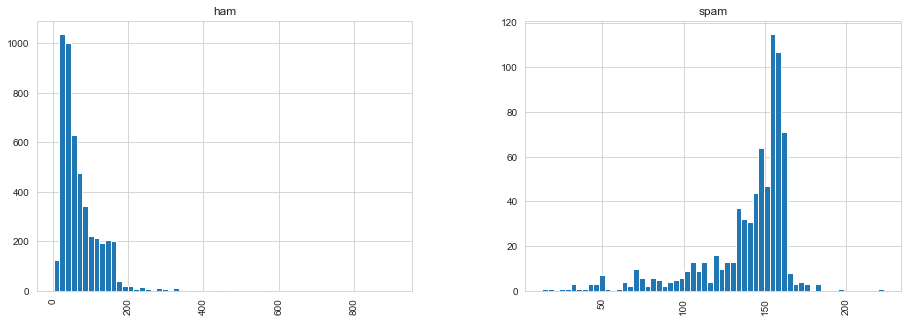

In [21]:
sns.set_style('whitegrid')
df.hist(column='length of message',by='spam/ham',bins = 60,figsize = (15,5))

# Function to tokenize our messages 
- This function removes punctuation marks and stop words from our messages and creates a lowercase version of the cleaned message.
---
Note : The stop words package consists of all the commonly used words which do not contribute much to Spam/Ham classification.

In [22]:
def clean_message(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [c for c in nopunc.split() if c.lower() not in stopwords.words('english')]

In [23]:
df['Message'].head(5).apply(clean_message)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [24]:
bow_transformer = CountVectorizer(analyzer=clean_message).fit(df['Message'])

In [25]:
print(len(bow_transformer.vocabulary_))

11425


# Creating Bag of words using bow_transformer

In [26]:
messages_bow = bow_transformer.transform(df['Message'])

In [27]:
print("Shape of Sparse Matrix: ",messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


nnz returns the number of non zero occurances

In [28]:
messages_bow.nnz

50548

In [29]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.07940295412668218


In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

# Calculating the inverse term frequency for bag of words

In [31]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [32]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Creating train, test set and a pipeline for the above process
## The pipeline includes following:
- Creating bag of words using CountVectorizer function from sklearn.feature_extraction.text library.
- Calculating the inverse term frequency for bag of words.
- Using Naives Bayes multinomial classifier for Spam/Ham Classification.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [35]:
msg_train,msg_test,label_train,label_test = train_test_split(df['Message'],df['spam/ham'],test_size=0.3)

In [36]:
names = ['MultinomialNB','RandomForest','KNN','DecisionTreeClassifier']
classifiers = [MultinomialNB(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier()]


In [37]:
from sklearn.pipeline import Pipeline
for name,classifier in zip(names,classifiers):
    #print('{} {} {} \n'.format(name,classifier,param_grid[name]))
    pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=clean_message)),
    ('tfidf',TfidfTransformer()),
    ('Classifier',classifier),
    ])
    pipeline.fit(msg_train,label_train)
    print('ModelName : {}, Training Score : {}'.format(name,pipeline.score(msg_train,label_train)))

ModelName : MultinomialNB, Training Score : 0.9782051282051282
ModelName : RandomForest, Training Score : 1.0
ModelName : KNN, Training Score : 0.9105128205128206
ModelName : DecisionTreeClassifier, Training Score : 1.0


# Testing the best models on Validation Set.

# RandomForestClassifier

In [40]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=clean_message)),
    ('tfidf',TfidfTransformer()),
    ('Classifier',RandomForestClassifier()),
    ])
pipeline.fit(msg_train,label_train)
preds = pipeline.predict(msg_test)
print(classification_report(label_test,preds))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1430
        spam       0.99      0.82      0.90       242

    accuracy                           0.97      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.97      0.97      0.97      1672



# DecisionTreeClassifier

In [41]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=clean_message)),
    ('tfidf',TfidfTransformer()),
    ('Classifier',DecisionTreeClassifier()),
    ])
pipeline.fit(msg_train,label_train)
preds = pipeline.predict(msg_test)
print(classification_report(label_test,preds))

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1430
        spam       0.92      0.80      0.86       242

    accuracy                           0.96      1672
   macro avg       0.94      0.89      0.92      1672
weighted avg       0.96      0.96      0.96      1672



# Multinomial NaiveBayes Classifier

In [42]:
pipeline_final = Pipeline([
    ('bow',CountVectorizer(analyzer=clean_message)),
    ('tfidf',TfidfTransformer()),
    ('Classifier',MultinomialNB()),
    ])
pipeline_final.fit(msg_train,label_train)
preds = pipeline_final.predict(msg_test)
print(classification_report(label_test,preds))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1430
        spam       1.00      0.68      0.81       242

    accuracy                           0.95      1672
   macro avg       0.97      0.84      0.89      1672
weighted avg       0.96      0.95      0.95      1672



# This function classifies your message as Spam or Ham

In [43]:
def pred_spam_ham():
    text = input('Enter your Message Here! \n')
    print(pipeline_final.predict(text.split()))
    return 'Spam' if 'spam' in pipeline_final.predict(text.split()) else 'Ham'
    

In [44]:
pred_spam_ham()

Enter your Message Here! 
FREE GAME. Get Rayman Golf 4 FREE from
['spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham']


'Spam'